# Naive Classifier for Fake news recognition

## Packages

In [1]:
library(tidyverse)
library(ggplot2)
library(stopwords)
library(tidytext)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



## Reading the data

In [2]:
train.filename <- 'dataset/archive/train.csv'
test.filename <- 'dataset/archive/test.csv'

In [3]:
train2.filename <- 'dataset/fake-news/train.csv'
test2.filename <- 'dataset/fake-news/test.csv'

In [4]:
train.df <- read.delim(train.filename, sep = ',')
test.df <- read.delim(test.filename, sep = ',')

In [5]:
# train2.df <- read.delim(train2.filename, sep = ',')
# test2.df <- read.delim(test2.filename, sep = ',')

## Display the train and test datasets

In [6]:
head(test.df)

,Text,Text_Tag
,<chr>,<chr>
1,Building a wall on the U.S.-Mexico border will take literally years.,immigration
2,Wisconsin is on pace to double the number of layoffs this year.,jobs
3,Says John McCain has done nothing to help the vets.,"military,veterans,voting-record"
4,Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.,"medicare,message-machine-2012,campaign-advertising"
5,"When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.","campaign-finance,legal-issues,campaign-advertising"
6,Over the past five years the federal government has paid out $601 million in retirement and disability benefits to deceased former federal employees.,"federal-budget,pensions,retirement"


In [7]:
head(train.df)

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"
6,5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


In [8]:
# head(train2.df)

In [9]:
# head(test2.df)

# Splitting the datasets

In [10]:
# shuffle
train.df=train.df[sample(1:nrow(train.df), replace = F),] # shuffle the dataset

In [11]:
# set splitting percentages
perc_split<- 0.8  # set splitting percentages
n_rows<- nrow(train.df)
n_rows_train<-floor(n_rows*perc_split)

In [12]:
# splitting
train.df.train <- train.df[1:n_rows_train, ]
train.df.validation <- train.df[-c(1:n_rows_train), ]

In [13]:
cat('Total rows:',nrow(train.df),
    '\nTrain rows:',nrow(train.df.train),
    '\nValidation rows',nrow(train.df.validation))

Total rows: 10240 
Train rows: 8192 
Validation rows 2048

# Vocabulary creation

In [14]:
as.list(get_stopwords())$word

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "will"

In [15]:
colnames(train.df.train)

[1] "Labels"   "Text"     "Text_Tag"

In [16]:
train.df.train %>%
    select(Text) %>%
    unnest_tokens(word, Text) %>%
    anti_join(get_stopwords(), by = join_by(word)) %>%
    unique %>%
    arrange(word) -> vocabulary.train  #%>% filter(grepl('', word))

In [17]:
nrow(vocabulary.train)

[1] 11341

#### Some suggestion to create equivalence classes

In [18]:
vocabulary.train %>%
    filter(grepl("s$", word)) %>%
    head

,word
,<chr>
1,11s
2,16s
3,1800s
4,1920s
5,1930s
6,1950s


In [19]:
vocabulary.train %>%
    filter(grepl("al", word)) %>%
    head

,word
,<chr>
1,acalifornia
2,accidental
3,accidentally
4,accruals
5,acentral
6,actalters


In [20]:
vocabulary.train %>%
    filter(grepl("\\'s", word)) %>%
    head

,word
,<chr>
1,abc's
2,administration's
3,aig's
4,america's
5,arizona's
6,ayers's


In [21]:
train.df %>%
    filter(grepl("06", Text)) %>%
    filter(!grepl("2006", Text))  #%>% summarise(n())

Labels,Text,Text_Tag
<int>,<chr>,<chr>
2,"Americans bought into climate change in 2004-06, but then most began wandering away from this issue.","climate-change,environment,polls"
3,Says Rep. Paul Ryans budget roadmap doesnt balance the budget until the 2060s and adds an unthinkable $62 trillion to the national debt between now and then.,"deficit,federal-budget"
0,"They were going to build the wall a while ago, not so long ago, like in 06. And they couldnt get environmental impact statements.",immigration
5,"Over the last six months, President Barack Obama has golfed 10 times and held 106 fundraisers, but his jobs council has never met.","campaign-finance,economy,jobs,message-machine-2012,sports"
4,"In one county alone in Ohio, President Obama received 106,258 votes. But there were only 98,213 eligible voters.",elections
2,"The Republicans didn't have a budget in '02, '04, '06.","federal-budget,abc-news-week"


## About the data

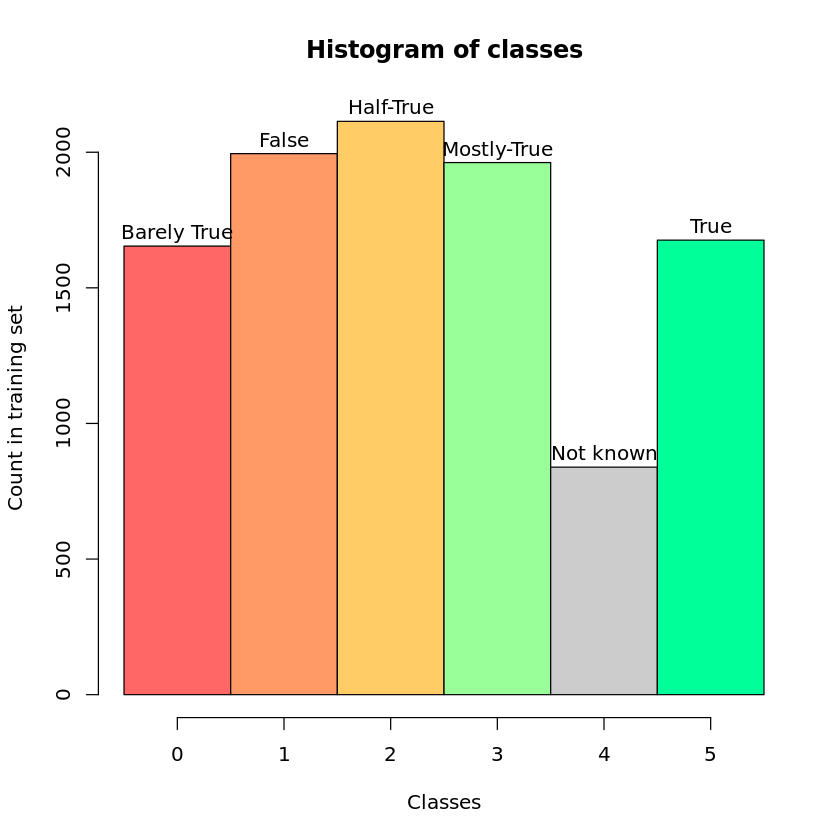

In [22]:
breaks <- seq(from=-0.5, to=5.5, by=1)
labels <- c('Barely True', 'False', 'Half-True', 'Mostly-True', 'Not known', 'True')
colors <- c('#FF6666','#FF9966', '#FFCC66', '#99FF99' , '#CCCCCC','#00FF99')

hist(x = train.df$Labels, 
     breaks = breaks, 
     labels = labels,
     main = 'Histogram of classes',
     xlab = 'Classes',
     ylab = 'Count in training set',
     col = colors
    )

# Count how many topics there are

In [23]:
train.df.train %>%
    select(Text_Tag) %>%
    unnest_tokens(word, Text_Tag, token = stringr::str_split, pattern = ",") %>%
    unique %>%
    arrange(word) -> topics

In [24]:
train.df.train  %>% filter(Text_Tag=='')

Labels,Text,Text_Tag
<int>,<chr>,<chr>
1,"Joe, I keep hearing you every morning talking about the biggest tax increase in history, but you don't mention it's also the biggest tax cut in history.'' health-care,taxes richard-durbin Senator Illinois democrat 0 2 1 0 1 a comment on the Morning Joe'' show on MSNBC.",


In [25]:
topics<-as.list(topics)$word

#### Number of unique topics

In [26]:
length(topics)

[1] 143

#### Most frequent and infrequent topics

In [27]:
counts<-vector()
for(i in seq_along(topics)){
    counts[i]<- as.numeric(train.df.train %>% filter(grepl(topics[i], Text_Tag)) %>% summarise(n()))
    }

In [28]:
topics_counts <- data.frame(topics, counts)

In [29]:
topics_counts %>%
    filter(topics != "") %>%
    arrange(desc(counts)) %>%
    head()

,topics,counts
,<chr>,<dbl>
1,economy,928
2,health-care,904
3,taxes,808
4,federal-budget,584
5,education,582
6,jobs,570


In [30]:
topics_counts %>%
    arrange(counts) %>%
    head()

,topics,counts
,<chr>,<dbl>
1,alcohol,0
2,death-penalty,1
3,fires,1
4,homeless,1
5,after-the-fact,2
6,autism,3
